## Grid Search
Lets say we are given Iris data and we converted it into xtrain, xtest.  
How can we figure out the best values of C and $\gamma$, which kernel to use, so there are many options for that.  
One option we can try is fitting our data, and then for different values of c and $\gamma$, look at test accuracy.  
Thats not a very good way of training our classifier. 
The reason is when you are using your testing data, to decide what is the best $\gamma$ and C, you are actualy using testing data for training.  
Choosing good value of C and $\gamma$ is the part of training process.  
Other option to choose good value of C and $\gamma$  is **cross-validation**.  
What is the step we would like to use?  
We would like to use different values of C with different values of $\gamma$ and all possible combinations.
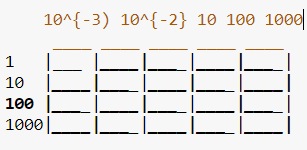

We will use the combination of the C and $\gamma$ where row is C and $\gamma$ is the column and we try the combination of these values. Thats called **Grid-Search**.  


In [2]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [4]:
x_train,x_test, y_train, y_test = train_test_split(x, y)

In [13]:
## first we create knn classifier
clf = KNeighborsClassifier()

## to create the grid search cv object, we need to pass 2 things, the base classifier, so its going to 
## fit different values, of c and gamma, SO in case of KNN, we find best value of K, in case of GridSearch, We find 
## best c and gamma.

## In this, grid is actually a dictionary, where the key is the parameter name.
## n_neighbours takes different values of K which we want to try. 

grid = {"n_neighbors": [3, 5, 7, 9, 11]}
abc = GridSearchCV(clf, grid)
abc.fit(x_train, y_train)
## it also provides the fit function, and once we fit it, it actually does what it requires, 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [14]:
## once we fit it, we can actually look at best estimator.  
## it is saying that the best result it got when k is 7.  


abc.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [15]:
## Now we can look at scores achieved by different values of k.
abc.cv_results_

## seems like it made 5 splits and on split 0 we have test score 
## split 0 ==  'split0_test_score': array([0.95652174, 0.95652174, 0.95652174, 0.95652174, 0.95652174]), 
## where it shows score for k = 3, 5, 7, 9, 11 respectively on split 0.  



{'mean_fit_time': array([0.00775542, 0.        , 0.00019865, 0.00019941, 0.00080338]),
 'std_fit_time': array([0.01505597, 0.        , 0.0003973 , 0.00039883, 0.00040182]),
 'mean_score_time': array([0.00141463, 0.00141616, 0.0012754 , 0.00132189, 0.00118918]),
 'std_score_time': array([0.00048004, 0.00047431, 0.00043108, 0.00031463, 0.00039747]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11}],
 'split0_test_score': array([0.95652174, 0.95652174, 0.95652174, 0.95652174, 0.95652174]),
 'split1_test_score': array([0.95652174, 1.        , 1.        , 0.95652174, 1.        ]),
 'split2_test_score': array([0.95454545, 1.        , 1.        , 0.95454545, 1.        ]),
 'split3_test_score': array([0.90909091, 0.90909091, 0.95454545, 0.95454545, 0.95454545])

In [16]:
## now we have done Grid Search using KNN, we must try it for Linear, Logistic regression as well. 
## For now, we try for SVM as well

## we create classifier for SVM, 
clf = svm.SVC()


## grid now will be more complicated.  
## Now here, 1e2 means 100, 1e3 means thousand 1e4 means 10000, 5e3 means 5000 and 1e5 means 100000. 
## and 1e-3 means 10^-3 and so on.

grid = {'C': [1e2, 1e3, 5e3, 1e4, 5e4, 1e5], 'gamma':[1e-3, 5e-4, 1e-4, 5e-3]}
abc = GridSearchCV(clf, grid)
abc.fit(x_train, y_train)



GridSearchCV(estimator=SVC(),
             param_grid={'C': [100.0, 1000.0, 5000.0, 10000.0, 50000.0,
                               100000.0],
                         'gamma': [0.001, 0.0005, 0.0001, 0.005]})

In [17]:
## then we as for best estimator.  
abc.best_estimator_

## seems like it is using c = 100 and gamma as 1e-3 as best estimator.  


SVC(C=100.0, gamma=0.001)

In [18]:
abc.cv_results_

{'mean_fit_time': array([4.22358036e-02, 2.07805634e-04, 3.51667404e-04, 7.71045685e-05,
        1.02806091e-04, 0.00000000e+00, 1.99365616e-04, 5.94329834e-04,
        5.98382950e-04, 7.97843933e-04, 9.97304916e-04, 6.11019135e-04,
        2.73847580e-04, 0.00000000e+00, 1.25122070e-03, 2.00638771e-03,
        1.74036026e-03, 1.06000900e-03, 7.97653198e-04, 6.09111786e-04,
        0.00000000e+00, 1.99270248e-04, 1.99413300e-04, 5.98573685e-04]),
 'std_fit_time': array([8.29766679e-02, 4.15611267e-04, 2.55438866e-04, 1.54209137e-04,
        2.05612183e-04, 0.00000000e+00, 3.98731232e-04, 4.85326710e-04,
        4.88577633e-04, 4.25177878e-04, 2.61174468e-07, 4.99377316e-04,
        3.36081026e-04, 0.00000000e+00, 9.16232109e-04, 4.28189679e-05,
        2.82661796e-04, 9.41315682e-05, 3.98826742e-04, 4.97679111e-04,
        0.00000000e+00, 3.98540497e-04, 3.98826599e-04, 4.88733421e-04]),
 'mean_score_time': array([0.00019951, 0.00018802, 0.        , 0.        , 0.00025678,
        0.00